In [1]:
!pip install keras-tcn
!pip install -U finance-datareader

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

/home/work/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2023-01-18 08:14:51.165578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 08:14:51.420611: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-18 08:15:00.741849: W tensorflow/compiler/xla/stream_executor/platform/default/

In [5]:
kospi_train = fdr.DataReader('KS11', '1990-01-01','2017-12-31')
print(kospi_train.head())
print(kospi_train)
print(kospi_train.shape)
print(kospi_train.isnull().any())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1996-12-11  705.989990  709.479980  704.429993  704.679993  704.679993   
1996-12-12  705.109985  706.010010  688.739990  689.380005  689.380005   
1996-12-13  690.440002  695.719971  677.640015  689.070007  689.070007   
1996-12-16  686.969971  686.969971  667.710022  673.919983  673.919983   
1996-12-17  675.349976  680.090027  660.390015  663.349976  663.349976   

             Volume  
Date                 
1996-12-11  28000.0  
1996-12-12  25900.0  
1996-12-13  26500.0  
1996-12-16  22800.0  
1996-12-17  31600.0  
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1996-12-11   705.989990   709.479980   704.429993   704.679993   704.679993   
1996-12-12   705.109985   706.010010   688.739990   689.380005   689.380005   
1996-12-13 

In [4]:
kospi_test = fdr.DataReader('KS11', '2018-01-01')['Close']
print(kospi_test)
print(kospi_test.shape)
print(kospi_test.isnull().any())

Date
2018-01-02    2479.649902
2018-01-03    2486.350098
2018-01-04    2466.459961
2018-01-05    2497.520020
2018-01-08    2513.280029
                 ...     
2023-01-11    2359.530029
2023-01-12    2365.100098
2023-01-13    2386.090088
2023-01-16    2399.860107
2023-01-17    2379.389893
Name: Close, Length: 1242, dtype: float64
(1242,)
False


In [5]:
kospi_train=kospi_train.dropna()
kospi_test=kospi_test.dropna()
print(kospi_train)
print(kospi_train.isnull().any())
print(kospi_test)
print(kospi_test.isnull().any())

Date
1996-12-11     704.679993
1996-12-12     689.380005
1996-12-13     689.070007
1996-12-16     673.919983
1996-12-17     663.349976
                 ...     
2017-12-21    2429.830078
2017-12-22    2440.540039
2017-12-26    2427.340088
2017-12-27    2436.669922
2017-12-28    2467.489990
Name: Close, Length: 5192, dtype: float64
False
Date
2018-01-02    2479.649902
2018-01-03    2486.350098
2018-01-04    2466.459961
2018-01-05    2497.520020
2018-01-08    2513.280029
                 ...     
2023-01-11    2359.530029
2023-01-12    2365.100098
2023-01-13    2386.090088
2023-01-16    2399.860107
2023-01-17    2379.389893
Name: Close, Length: 1242, dtype: float64
False


In [6]:
kospi_train = kospi_train.values
kospi_test = kospi_test.values

In [16]:
lookback_window = 60
x_train_1, y_train_1 = [], []
x_train_7, y_train_7 = [], []
x_train_15, y_train_15 = [], []
x_train_30, y_train_30 = [], []

In [17]:
for i in range(lookback_window, len(kospi_train)):
    x_train_1.append(kospi_train[i - lookback_window:i])
    y_train_1.append(kospi_train[i])

for i in range(lookback_window, len(kospi_train)-6):
    x_train_7.append(kospi_train[i - lookback_window:i])
    y_train_7.append(kospi_train[i:i+7])

for i in range(lookback_window, len(kospi_train)-14):
    x_train_15.append(kospi_train[i - lookback_window:i])
    y_train_15.append(kospi_train[i:i+15])

for i in range(lookback_window, len(kospi_train)-29):
    x_train_30.append(kospi_train[i - lookback_window:i])
    y_train_30.append(kospi_train[i:i+30])

In [18]:
x_train_1 = np.array(x_train_1)
y_train_1 = np.array(y_train_1)
x_train_1 = x_train_1.reshape((5132, -1, 1))
y_train_1 = y_train_1.reshape((-1, 1))

x_train_7 = np.array(x_train_7)
y_train_7 = np.array(y_train_7)
x_train_7 = x_train_7.reshape((5126, -1, 1))
y_train_7 = y_train_7.reshape((5126, -1, 1))

x_train_15 = np.array(x_train_15)
y_train_15 = np.array(y_train_15)
x_train_15 = x_train_15.reshape((5118, -1, 1))
y_train_15 = y_train_15.reshape((5118, -1, 1))

x_train_30 = np.array(x_train_30)
y_train_30 = np.array(y_train_30)
x_train_30 = x_train_30.reshape((5103, -1, 1))
y_train_30 = y_train_30.reshape((5103, -1, 1))

print(x_train_1.shape, x_train_7.shape, x_train_15.shape, x_train_30.shape)
print(y_train_1.shape, y_train_7.shape, y_train_15.shape, y_train_30.shape)

(5132, 60, 1) (5126, 60, 1) (5118, 60, 1) (5103, 60, 1)
(5132, 1) (5126, 7, 1) (5118, 15, 1) (5103, 30, 1)


In [27]:
x_test_1, y_test_1 = [], []
x_test_7, y_test_7 = [], []
x_test_15, y_test_15 = [], []
x_test_30, y_test_30 = [], []

In [28]:
for i in range(lookback_window, len(kospi_test)):
    x_test_1.append(kospi_test[i - lookback_window:i])
    y_test_1.append(kospi_test[i])
x_test_1 = np.array(x_test_1)
y_test_1 = np.array(y_test_1)
x_test_1 = x_test_1.reshape((1182, -1, 1))
y_test_1 = y_test_1.reshape((-1, 1))

for i in range(lookback_window, len(kospi_test)-6, 7):
    x_test_7.append(kospi_test[i - lookback_window:i])
    y_test_7.append(kospi_test[i:i+7])
x_test_7 = np.array(x_test_7)
y_test_7 = np.array(y_test_7)
x_test_7 = x_test_7.reshape((168, -1, 1))

for i in range(lookback_window, len(kospi_test)-14, 15):
    x_test_15.append(kospi_test[i - lookback_window:i])
    y_test_15.append(kospi_test[i:i+15])
x_test_15 = np.array(x_test_15)
y_test_15 = np.array(y_test_15)
x_test_15 = x_test_15.reshape((78, -1, 1))

for i in range(lookback_window, len(kospi_test)-29, 30):
    x_test_30.append(kospi_test[i - lookback_window:i])
    y_test_30.append(kospi_test[i:i+30])
x_test_30 = np.array(x_test_30)
y_test_30 = np.array(y_test_30)
x_test_30 = x_test_30.reshape((39, -1, 1))

In [30]:
model_1 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model_1.summary()
model_1.compile('adam', 'mae')
####
model_7 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(7, activation='linear')
])

model_7.summary()
model_7.compile('adam', 'mae')
####
model_15 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(15, activation='linear')
])

model_15.summary()
model_15.compile('adam', 'mae')
####
model_30 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(30, activation='linear')
])

model_30.summary()
model_30.compile('adam', 'mae')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_4 (TCN)                 (None, 64)                91136     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_5 (TCN)                 (None, 64)                91136     
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 91,591
Trainab

In [31]:
print('Train...')
model_1.fit(x_train_1, y_train_1, epochs=100, verbose=2)
p_test_1 = model_1.predict(x_test_1)

print('Train...')
model_7.fit(x_train_7, y_train_7, epochs=100, verbose=2)
p_test_7 = model_7.predict(x_test_7)

print('Train...')
model_15.fit(x_train_15, y_train_15, epochs=100, verbose=2)
p_test_15 = model_15.predict(x_test_15)

print('Train...')
model_30.fit(x_train_30, y_train_30, epochs=100, verbose=2)
p_test_30 = model_30.predict(x_test_30)

Train...
Epoch 1/100


2023-01-17 10:02:00.140526: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2023-01-17 10:02:03.848616: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-17 10:02:03.888533: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7ef42c0e8e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-17 10:02:03.888615: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.6
2023-01-17 10:02:04.237453: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-17 10:02:06.506875: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


161/161 - 41s - loss: 1862.7177 - 41s/epoch - 257ms/step
Epoch 2/100
161/161 - 5s - loss: 316.0314 - 5s/epoch - 32ms/step
Epoch 3/100
161/161 - 3s - loss: 165.6034 - 3s/epoch - 21ms/step
Epoch 4/100
161/161 - 3s - loss: 109.0646 - 3s/epoch - 20ms/step
Epoch 5/100
161/161 - 3s - loss: 121.4245 - 3s/epoch - 20ms/step
Epoch 6/100
161/161 - 3s - loss: 83.5529 - 3s/epoch - 20ms/step
Epoch 7/100
161/161 - 3s - loss: 63.9038 - 3s/epoch - 20ms/step
Epoch 8/100
161/161 - 3s - loss: 87.6247 - 3s/epoch - 20ms/step
Epoch 9/100
161/161 - 3s - loss: 73.9436 - 3s/epoch - 20ms/step
Epoch 10/100
161/161 - 3s - loss: 81.4257 - 3s/epoch - 21ms/step
Epoch 11/100
161/161 - 3s - loss: 69.8848 - 3s/epoch - 20ms/step
Epoch 12/100
161/161 - 3s - loss: 54.1735 - 3s/epoch - 20ms/step
Epoch 13/100
161/161 - 3s - loss: 56.1960 - 3s/epoch - 20ms/step
Epoch 14/100
161/161 - 3s - loss: 47.5008 - 3s/epoch - 21ms/step
Epoch 15/100
161/161 - 3s - loss: 82.8785 - 3s/epoch - 21ms/step
Epoch 16/100
161/161 - 3s - loss: 51.

Epoch 27/100
161/161 - 3s - loss: 35.8038 - 3s/epoch - 21ms/step
Epoch 28/100
161/161 - 3s - loss: 35.9861 - 3s/epoch - 22ms/step
Epoch 29/100
161/161 - 3s - loss: 34.3846 - 3s/epoch - 21ms/step
Epoch 30/100
161/161 - 3s - loss: 33.0022 - 3s/epoch - 21ms/step
Epoch 31/100
161/161 - 3s - loss: 34.6724 - 3s/epoch - 21ms/step
Epoch 32/100
161/161 - 4s - loss: 33.4948 - 4s/epoch - 22ms/step
Epoch 33/100
161/161 - 3s - loss: 34.3349 - 3s/epoch - 21ms/step
Epoch 34/100
161/161 - 3s - loss: 34.0105 - 3s/epoch - 20ms/step
Epoch 35/100
161/161 - 3s - loss: 32.8498 - 3s/epoch - 21ms/step
Epoch 36/100
161/161 - 3s - loss: 32.4134 - 3s/epoch - 21ms/step
Epoch 37/100
161/161 - 3s - loss: 31.2345 - 3s/epoch - 21ms/step
Epoch 38/100
161/161 - 3s - loss: 31.8829 - 3s/epoch - 21ms/step
Epoch 39/100
161/161 - 3s - loss: 33.1726 - 3s/epoch - 20ms/step
Epoch 40/100
161/161 - 3s - loss: 32.7161 - 3s/epoch - 20ms/step
Epoch 41/100
161/161 - 3s - loss: 33.6216 - 3s/epoch - 20ms/step
Epoch 42/100
161/161 - 3s

160/160 - 3s - loss: 40.4936 - 3s/epoch - 21ms/step
Epoch 53/100
160/160 - 3s - loss: 40.8320 - 3s/epoch - 21ms/step
Epoch 54/100
160/160 - 3s - loss: 40.0018 - 3s/epoch - 21ms/step
Epoch 55/100
160/160 - 3s - loss: 40.0599 - 3s/epoch - 20ms/step
Epoch 56/100
160/160 - 3s - loss: 40.5626 - 3s/epoch - 20ms/step
Epoch 57/100
160/160 - 3s - loss: 39.8954 - 3s/epoch - 20ms/step
Epoch 58/100
160/160 - 3s - loss: 39.7762 - 3s/epoch - 21ms/step
Epoch 59/100
160/160 - 3s - loss: 39.3429 - 3s/epoch - 20ms/step
Epoch 60/100
160/160 - 3s - loss: 40.0047 - 3s/epoch - 20ms/step
Epoch 61/100
160/160 - 3s - loss: 39.2915 - 3s/epoch - 20ms/step
Epoch 62/100
160/160 - 3s - loss: 39.4296 - 3s/epoch - 21ms/step
Epoch 63/100
160/160 - 3s - loss: 39.8786 - 3s/epoch - 21ms/step
Epoch 64/100
160/160 - 3s - loss: 39.8146 - 3s/epoch - 21ms/step
Epoch 65/100
160/160 - 3s - loss: 40.1461 - 3s/epoch - 21ms/step
Epoch 66/100
160/160 - 3s - loss: 39.5731 - 3s/epoch - 21ms/step
Epoch 67/100
160/160 - 3s - loss: 39.2

Epoch 78/100
160/160 - 3s - loss: 52.6422 - 3s/epoch - 21ms/step
Epoch 79/100
160/160 - 3s - loss: 52.6271 - 3s/epoch - 21ms/step
Epoch 80/100
160/160 - 3s - loss: 52.4516 - 3s/epoch - 21ms/step
Epoch 81/100
160/160 - 4s - loss: 52.2802 - 4s/epoch - 22ms/step
Epoch 82/100
160/160 - 3s - loss: 52.3859 - 3s/epoch - 21ms/step
Epoch 83/100
160/160 - 3s - loss: 52.3319 - 3s/epoch - 21ms/step
Epoch 84/100
160/160 - 3s - loss: 52.0877 - 3s/epoch - 21ms/step
Epoch 85/100
160/160 - 3s - loss: 52.8079 - 3s/epoch - 21ms/step
Epoch 86/100
160/160 - 3s - loss: 52.1320 - 3s/epoch - 21ms/step
Epoch 87/100
160/160 - 3s - loss: 52.5719 - 3s/epoch - 21ms/step
Epoch 88/100
160/160 - 3s - loss: 51.9625 - 3s/epoch - 21ms/step
Epoch 89/100
160/160 - 3s - loss: 51.9925 - 3s/epoch - 21ms/step
Epoch 90/100
160/160 - 3s - loss: 52.3565 - 3s/epoch - 22ms/step
Epoch 91/100
160/160 - 4s - loss: 52.5214 - 4s/epoch - 23ms/step
Epoch 92/100
160/160 - 3s - loss: 52.1109 - 3s/epoch - 22ms/step
Epoch 93/100
160/160 - 3s

In [32]:
model_1.save('kospi_1day.h5')
model_7.save('kospi_7days.h5')
model_15.save('kospi_15days.h5')
model_30.save('kospi_30days.h5')

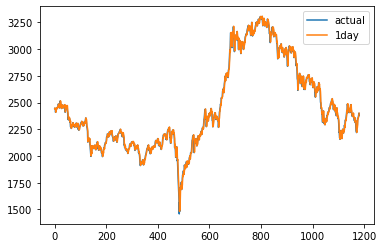

In [39]:
y_test_1 = y_test_1.flatten()
y_test_7 = y_test_7.flatten()
y_test_15 = y_test_15.flatten()
y_test_30 = y_test_30.flatten()
p_test_1 = p_test_1.flatten()
p_test_7 = p_test_7.flatten()
p_test_15 = p_test_15.flatten()
p_test_30 = p_test_30.flatten()

plt.plot(y_test_1)
plt.plot(p_test_1)
plt.legend(['actual', '1day'])
plt.show()

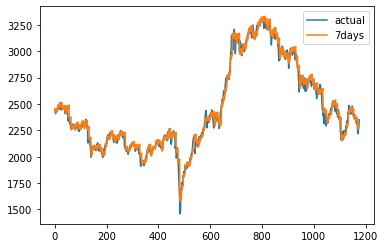

In [40]:
plt.plot(y_test_7)
plt.plot(p_test_7)
plt.legend(['actual', '7days'])
plt.show()

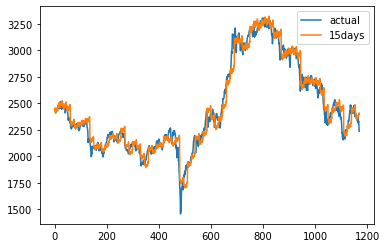

In [41]:
plt.plot(y_test_15)
plt.plot(p_test_15)
plt.legend(['actual', '15days'])
plt.show()

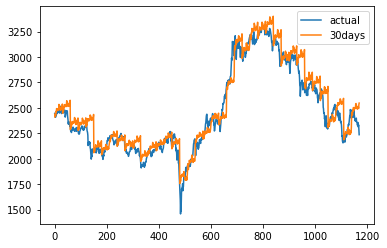

In [42]:
plt.plot(y_test_30)
plt.plot(p_test_30)
plt.legend(['actual', '30days'])
plt.show()